In [1]:
state = 'MT' 
year = 2020

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json
from epsilon_constraint import*
import networkx as nx

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of MT has 2 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from MT_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 0 plans from file.


In [6]:
obj_type = 'inverse_Polsby_Popper'
starting_deviation = 0.01 
verbose = True
contiguity = 'lcut'               # {'lcut', 'scf', 'shir'}
warm_start_mode = 'user'          # {'None', 'user', 'refinement'}
warm_starts = warm_starts         # if you have user define warm starts else it is None
time_limit = 7200                 # Time limit in seconds, adjust as needed
multiplier = 0                    # Adjust multiplier as needed
max_B = True                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True
symmetry_breaking = 'orbitope'    # {None, 'orbitope', 'rsum'}              
sizes = None

In [7]:
print(f"Running epsilon constraint method for state {state}, objective {obj_type}")
print(f"{'#' * 100}\n")
(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity,        
            cutoff=None,       
            verbose=verbose,
            warm_start_mode = warm_start_mode,
            warm_starts=warm_starts,  
            starting_deviation=starting_deviation, 
            time_limit=time_limit, 
            sizes=sizes,      
            max_B=max_B,      
            symmetry_breaking=symmetry_breaking,
            state=state,
            year=year
        )

Running epsilon constraint method for state MT, objective inverse_Polsby_Popper
####################################################################################################

L = 536692 and U = 547533

****************************************
Trying deviation = 5421.125
****************************************
No valid warm start used.

****************************************
Running labeling model!
****************************************
L = 536692 and U = 547533
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (

* 1038   497              36       2.8274182    2.72857  3.50%  37.7    5s
* 1053   460              34       2.8105402    2.81054  0.00%  37.4    5s

Cutting planes:
  Gomory: 17
  Cover: 1
  Flow cover: 2
  Zero half: 28
  RLT: 6
  Lazy constraints: 66

Explored 1054 nodes (41494 simplex iterations) in 5.40 seconds (2.91 work units)
Thread count was 20 (of 20 available processors)

Solution count 6: 2.81054 2.82742 3.07229 ... 3.13254

Optimal solution found (tolerance 0.00e+00)
Best objective 2.810540193397e+00, best bound 2.810540193397e+00, gap 0.0000%

User-callback calls 3495, time in user-callback 0.36 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
[[0, 1, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 20, 21, 24, 25, 27, 28, 30, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 52, 55], [2, 3, 4, 10, 13, 19, 22, 23, 26, 29, 31, 35, 46, 47, 51, 53, 54]]

**********************************

     0     0    1.50106    0   73          -    1.50106      -     -    0s
     0     0    1.52313    0   73          -    1.52313      -     -    0s
     0     0    1.52521    0   78          -    1.52521      -     -    0s
     0     0    1.52588    0   78          -    1.52588      -     -    0s
     0     0    1.52699    0   82          -    1.52699      -     -    0s
     0     0    1.53130    0   82          -    1.53130      -     -    0s
     0     0    1.53504    0   79          -    1.53504      -     -    0s
     0     0    1.54475    0   80          -    1.54475      -     -    0s
     0     0    1.54475    0   81          -    1.54475      -     -    0s
     0     0    1.54576    0   80          -    1.54576      -     -    0s
     0     0    1.56882    0   82          -    1.56882      -     -    0s
     0     0    1.57209    0   84          -    1.57209      -     -    0s
     0     0    1.57209    0   84          -    1.57209      -     -    0s
     0     0    1.57738  

Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 1728 rows, 1394 columns and 5821 nonzeros
Model fingerprint: 0x875d49be
Model has 2 quadratic constraints
Variable types: 342 continuous, 1052 integer (1052 binary)
Coefficient statistics:
  Matrix range     [2e-03, 2e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+05]
Presolve removed 925 rows and 662 columns
Presolve time: 0.00s
Pr

     0     0    1.53067    0   83          -    1.53067      -     -    0s
     0     0    1.53204    0   87          -    1.53204      -     -    0s
     0     0    1.53374    0   87          -    1.53374      -     -    0s
     0     2    1.55458    0   87          -    1.55458      -     -    0s
  5628  3696    6.24790   43   48          -    2.58073      -  25.1    5s
 36296 23553    5.31721   39   13          -    3.33240      -  21.0   10s
 60683 39476    6.21835   27   84          -    3.47865      -  20.7   15s
 81523 52068    4.67989   26   25          -    3.57219      -  20.5   20s
 97331 60605    4.93564   33   33          -    3.64774      -  20.4   25s
 114116 69472    8.12536   56    3          -    3.71455      -  20.4   30s
H119802 46276                       6.6290281    3.73366  43.7%  20.4   31s
H123899  5284                       4.1511539    3.76115  9.40%  20.4   33s
H124342   950                       3.9608288    3.77056  4.80%  20.4   34s

Cutting planes:
  Go

 374737 210797    4.97415   46   16          -    4.07625      -  20.0  130s
 387064 216790    7.73615   41   35          -    4.09336      -  20.0  135s
 398912 223002 infeasible   49               -    4.11085      -  20.1  140s
 411650 229399    5.95460   30   96          -    4.12809      -  20.1  145s
 424793 235792    6.54014   42   33          -    4.14705      -  20.1  150s
 436410 241415    6.89605   35   63          -    4.16262      -  20.1  155s
 448071 247304    7.37755   37   44          -    4.17513      -  20.2  160s
 459558 253203    7.89145   49   10          -    4.18954      -  20.2  165s
 468034 257519 infeasible   48               -    4.20026      -  20.2  170s
 479453 263433    7.68219   53   13          -    4.21367      -  20.2  175s
 490480 269034    4.87165   33   84          -    4.22782      -  20.3  180s
 500108 273968   11.16303   49   10          -    4.23883      -  20.3  185s
 509075 277909 infeasible   52               -    4.24969      -  20.3  190s

In [8]:
result = list(zip(plans, obj_bounds , deviations))

In [9]:
# Determine the senses for the Pareto frontier
# Minimize the first objective ('deviation').
# Maximize the second objective for compactness types, otherwise minimize it.
senses = ['min', 'max' if obj_type in ['average_Polsby_Popper','bottleneck_Polsby_Popper'] else 'min']
obj_names = ['deviation_persons', obj_type]
infeasible_region = [0, min(round(r[2],1) for r in result)]


####################################################################################################
Pareto Frontier for state MT,  objective inverse_Polsby_Popper
####################################################################################################

Pareto front plans: [[[0, 1, 5, 6, 7, 8, 9, 11, 12, 15, 16, 17, 20, 21, 24, 25, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 41, 42, 43, 44, 46, 48, 49, 51, 52, 53, 55], [2, 3, 4, 10, 13, 14, 18, 19, 22, 23, 26, 31, 35, 39, 40, 45, 47, 50, 54]], [[1, 5, 6, 7, 8, 9, 12, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52], [0, 2, 3, 4, 10, 11, 13, 19, 22, 23, 24, 26, 34, 35, 42, 43, 46, 47, 51, 53, 54, 55]], [[1, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52, 55], [0, 2, 3, 4, 10, 11, 12, 13, 19, 22, 23, 24, 26, 29, 34, 35, 42, 43, 46, 47, 51, 53, 54]], [[0, 1, 5, 6, 7, 8, 9, 11, 14, 15, 16, 17, 18, 20, 2

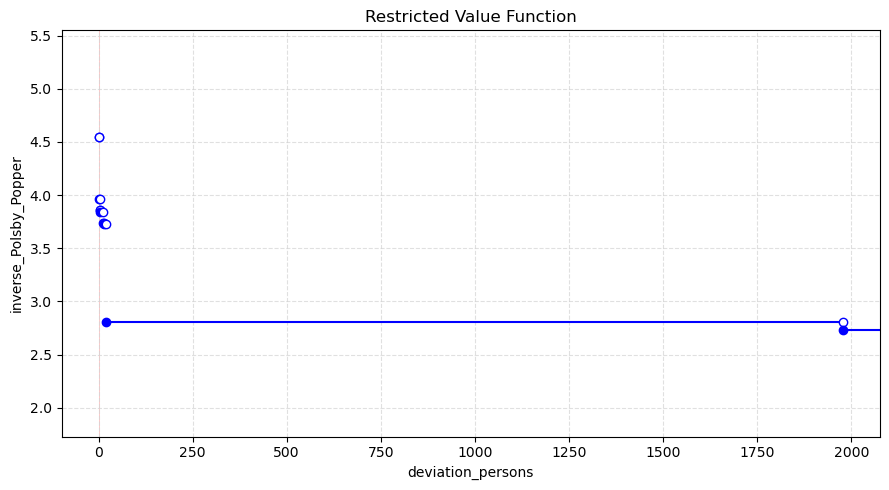

In [10]:
from pareto import ParetoFrontier

print(f"\n{'#' * 100}\nPareto Frontier for state {state},  objective {obj_type}\n{'#' * 100}\n")
pareto = ParetoFrontier(senses, obj_names, state=state, level='county')

if not  plans:
    print("No plan found!")
else:
    for plan, obj_bound, dev in result:
        upper_bound = [dev,  1/obj_bound[0] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[0]]
        lower_bound = [dev,  1/obj_bound[1] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[1]]
        
        pareto.add_plan(plan, upper_bound, lower_bound)
            
print("Pareto front plans:", pareto.plans)
print("Pareto front upper bounds:", pareto.upper_bounds)
print("Pareto front lower bounds:", pareto.lower_bounds) 

extra_points = None
extra_colors = None
        
pareto.tighten_lower_bounds()

if infeasible_region[1] > 0.5:
    max_dev = max(upper_bound[0] for upper_bound in pareto.upper_bounds)
    max_obj = max(upper_bound[1] for upper_bound in pareto.upper_bounds)
    min_obj = min(upper_bound[1] for upper_bound in pareto.upper_bounds)
    o1lim=[-1, max_dev+100]
    o2lim=[min_obj*0.9, max_obj*(1.1)]
else:
    o1lim = None
    o2lim = None

pareto.plot_with_custom_x_ranges(method = 'epsilon_constraint_method', 
                                 o1lim=o1lim, o2lim=o2lim, infeasible_region = infeasible_region,
                                 extra_points=extra_points, extra_colors=extra_colors)


####################################################################################################
Pareto maps for state MT, objective inverse_Polsby_Popper
####################################################################################################



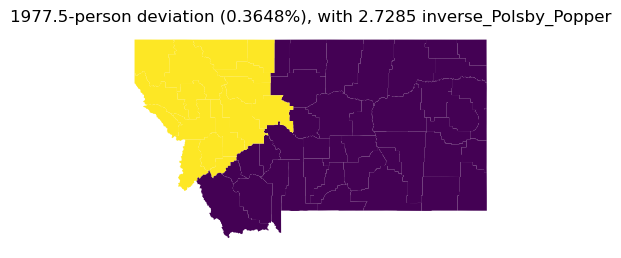

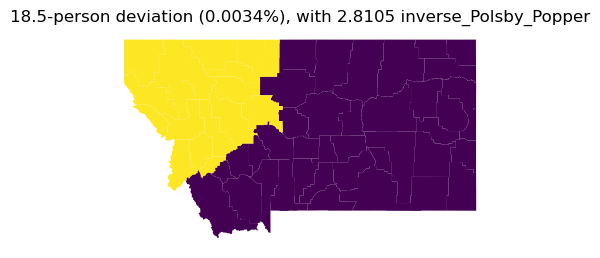

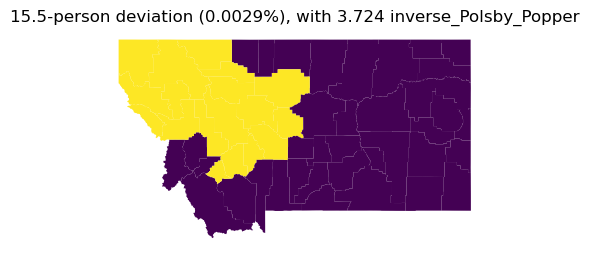

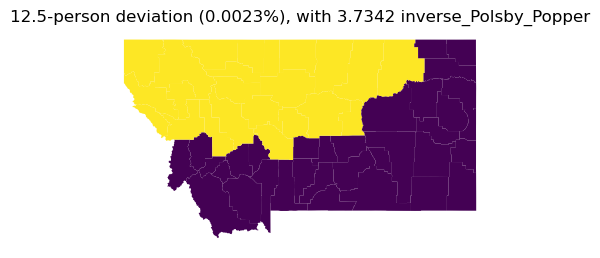

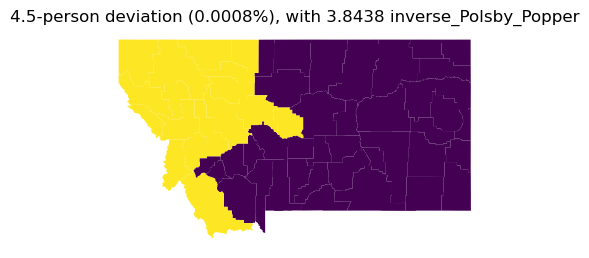

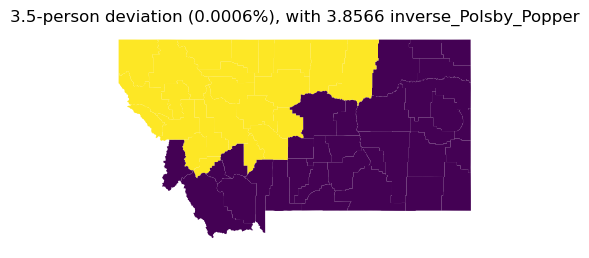

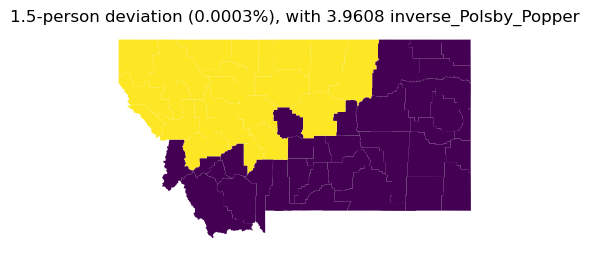

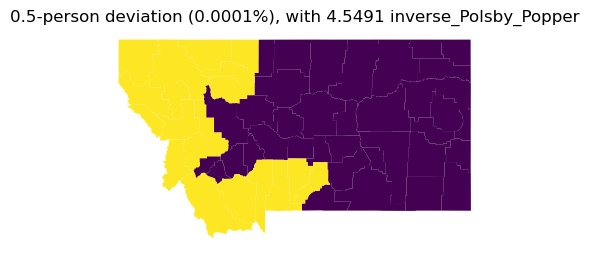

In [11]:
from draw import *

print(f"\n{'#' * 100}\nPareto maps for state {state}, objective {obj_type}\n{'#' * 100}\n")

format_obj = {
    'bottleneck_Polsby_Popper': lambda x: round(1 /x, 4),
    'cut_edges': lambda x: round(x, 0)}

for plan, obj_bound, dev in result:
    ub = format_obj.get(obj_type, lambda x: round(x, 4))(obj_bound[0])
    lb = format_obj.get(obj_type, lambda x: round(x, 4))(obj_bound[1])
    deviation_percentage = round(100 * dev / G._ideal_population, 4)
    if ub != lb:
        title = f"{round(dev, 2)}-person deviation ({deviation_percentage}%), obj_bounds [{ub}, {lb}] {obj_type}"
    else:
        title = f"{round(dev, 2)}-person deviation ({deviation_percentage}%), with {ub} {obj_type}"

    draw_plan(filepath, filename2, G, plan, title=title, year=year)